In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#constants
tf=0.24*2*pi
xi=1.0/3.0
x=linspace(-2.5/sqrt(xi),2.5/sqrt(xi),6000)
t=linspace(0,tf,200)
dx=(2.5/sqrt(xi)-(-2.5/sqrt(xi)))/6000.0
dt=tf/200.0

In [5]:
#functions

##boundary condditions for the states
def psiI(x):
    return (pi**(-1.0/4.0))*exp(-(x**2)/2.0)

def psiF(x):
    return (xi**(1.0/4.0))*psiI(sqrt(xi)*x)
    #return x*psiI(x)/sqrt(2)

##interpolating function
def eta(t):
    return ((t**3.0)/(tf**3.0))*(1 + 3.0*(1 - (t/tf)) + 6.0*(1 - (t/tf))**2.0)

##Time dependent Density
def rho(x,t):
    rho0=(1 - eta(t))*psiI(x) + eta(t)*psiF(x) 
    Z=trapz(rho0**2)*dx
    return rho0/sqrt(Z)
##energy terms change if the wave functions are not gaussian 
def phi(t):
        return (t/tf)*(1 - (t/tf))*((0.5*xi + 0.5)*t - 0.5*tf)
    
def VI(x):
    return 0.5*x**2

def VF(x):
    return 0.5*(xi**2)*x**2

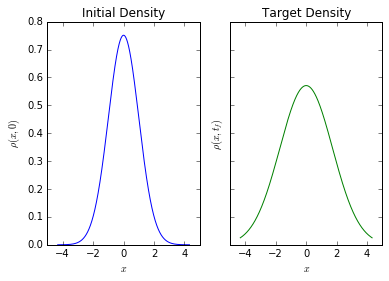

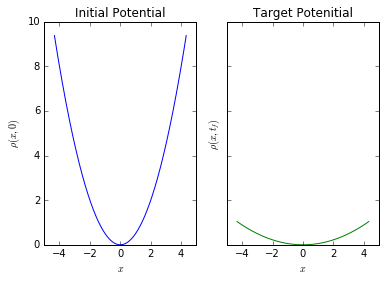

In [6]:
'''
fig=subplots
title("Initial Probability")
ylabel(r'$\rho (x,0)$')
xlabel(r'$x$')
plot(x,psiI(x)**2)
show()

title("Target WaveFunction")
ylabel(r'$\rho (x,t_{f})$')
xlabel(r'$x$')
plot(x,psiF(x)**2)
show()
'''

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x,sqrt(psiI(x)**2))
ax1.set_title('Initial Density')
ax1.set_ylabel(r'$\rho (x,0)$')
ax1.set_xlabel(r'$x$')
ax2.plot(x,sqrt(psiF(x)**2),c='g')
ax2.set_title('Target Density')
ax2.set_ylabel(r'$\rho (x,t_{f})$')
ax2.set_xlabel(r'$x$')

show()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x,VI(x))
ax1.set_title('Initial Potential')
ax1.set_ylabel(r'$\rho (x,0)$')
ax1.set_xlabel(r'$x$')
ax2.plot(x,VF(x),c='g')
ax2.set_title('Target Potenitial')
ax2.set_ylabel(r'$\rho (x,t_{f})$')
ax2.set_xlabel(r'$x$')

show()

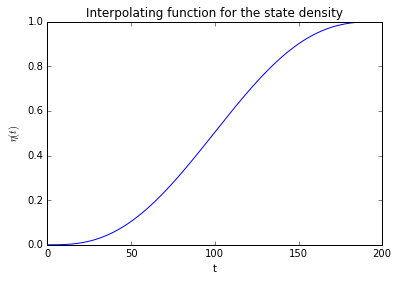

In [7]:
#interpolating function
title("Interpolating function for the state density")
ylabel(r"$\eta(t)$")
xlabel("t")
plot(eta(t))
show()


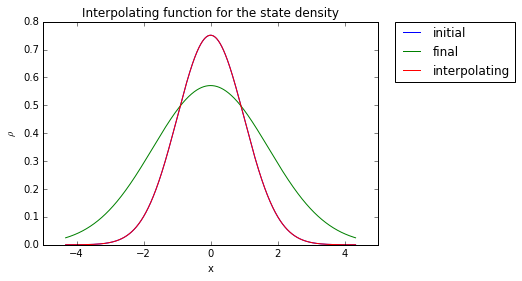

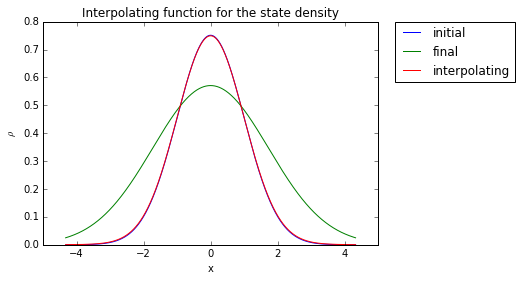

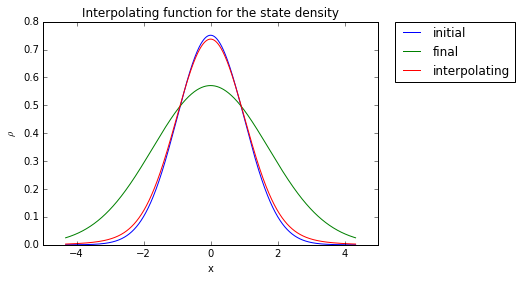

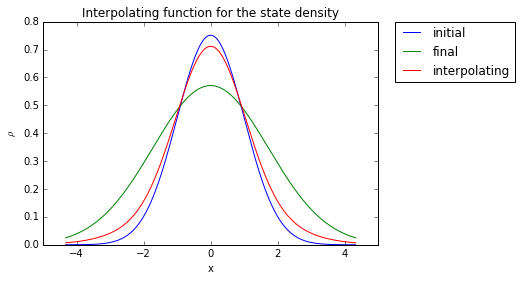

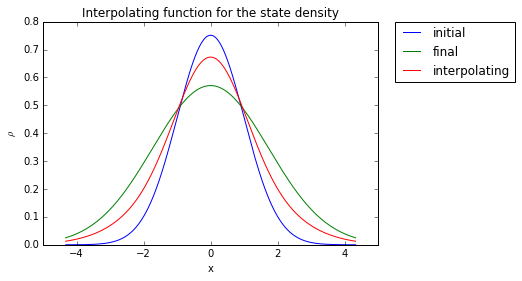

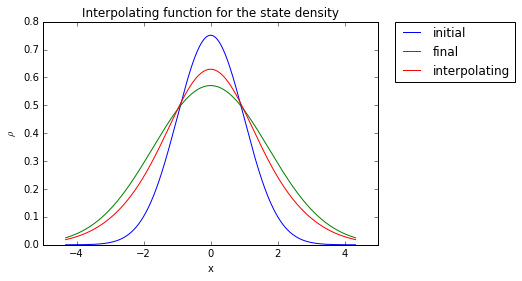

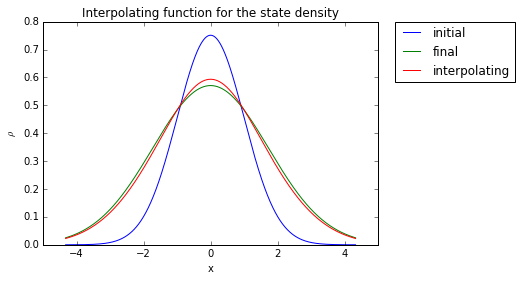

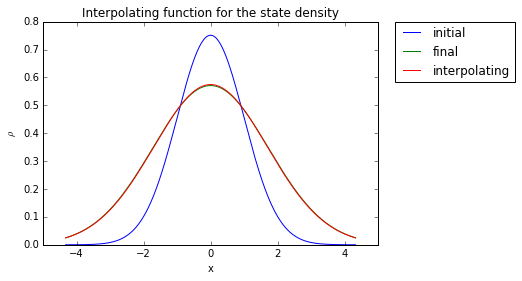

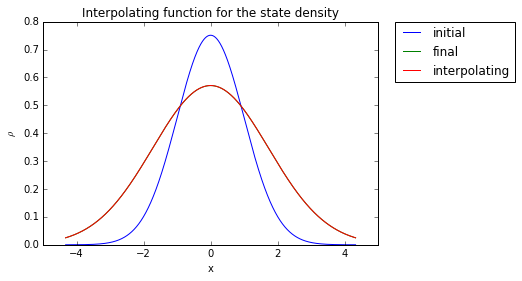

In [8]:
#interpolating function
slices=9
for i in range(0,slices):
    title("Interpolating function for the state density")
    ylabel(r"$\rho$")
    xlabel("x")
    plot(x,psiI(x),label="initial")
    plot(x,psiF(x),label="final")
    plot(x,rho(x,i*tf/float(slices-1)),label="interpolating",c='r')
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    show()



6000

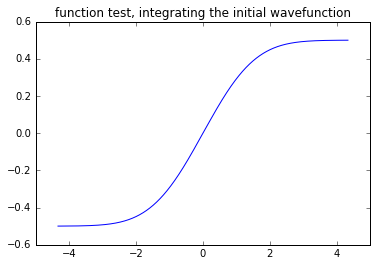

In [9]:
#numerical definite integral
def Ninteg(x,func,x0,xf,dx):
    init=argmin((x-x0)**2)
    finit=zeros(size(xf))
    for i in range(0,size(xf)):
        finit[i]=argmin((x-xf[i])**2)
    finit=finit.astype(int)
    arginit=where(finit==init)[0][0]
    finitl=finit[0:arginit]
    finith=finit[arginit:]
    intfunc=zeros(size(xf))
    for i in range(size(finitl)):
        intfunc[i]=-trapz(func[init:finitl[i]:-1])*dx
        #print(i,intfunc[i])
    for i in range(size(finith)):
        intfunc[arginit+i]=trapz(func[init:finith[i]])*dx
        #print(arginit+i,intfunc[arginit+i])
    return intfunc
title("function test, integrating the initial wavefunction")
plot(x,Ninteg(x,psiF(x)*psiF(x),0,x,dx))  
size(Ninteg(x,psiF(x)*psiF(x),0,x,dx))

In [10]:
def Nderivat(func,di):
    #return append(diff(func)/di,(diff(func)/di)[-1])
    return gradient(func,di)

def Nderivat2(func,di):
    driv=zeros(size(func))
    diffcent=-diff(diff(func)[::-1])[::-1]
    driv[1:-1]=diffcent
    driv[0]=diffcent[0]
    driv[-1]=diffcent[-1]
    return driv/(di**2)


[ 0.00027673  0.00027755  0.0002792  ..., -0.0002792  -0.00027755
 -0.00027673]


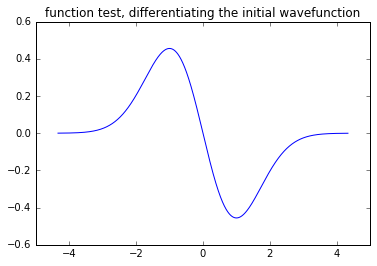

In [11]:
title("function test, differentiating the initial wavefunction")
plot(x,Nderivat(psiI(x),dx))
size(Nderivat(psiI(x),dx))
print(Nderivat(psiI(x),dx))

In [12]:
##now we're going to obtain the hydrodinamic velocity
rhogrid=array([rho(x,tau) for tau in t] )

Temp=[]
for element in rhogrid.T:
    Temp.append(Nderivat(element**2,dt))

Temp2=[]
for element2 in array(Temp).T:
    Temp2.append(Ninteg(x,element2,0,x,dx))


(200, 6000) (200, 6000)


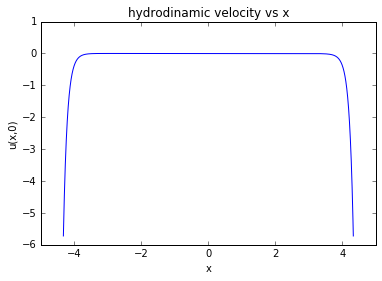

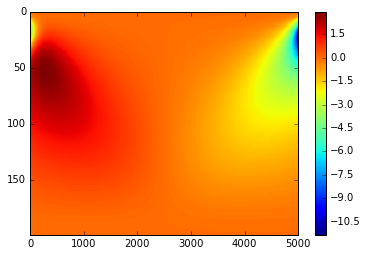

In [13]:


print(shape(Temp2),shape(rhogrid))
u=array(Temp2)/rhogrid**2
#plot(x,array(Temp).T[0,:])
#plot(x,Ninteg(x,Temp2[199],0,x,dx))
title("hydrodinamic velocity vs x")
ylabel("u(x,0)")
xlabel("x")
plot(x,u[0,:])
plt.show()

plt.imshow(u[:,500:-500], interpolation='nearest', aspect='auto')
plt.colorbar()

In [14]:
## obtaining the first term of the potential


Temp3=[]
for element3 in u.T:
    Temp3.append(Nderivat(element,dt))
Temp4=[]
for element4 in array(Temp3).T:
    Temp4.append(Ninteg(x,element4,0,x,dx))
first=array(Temp4)
print(shape(Temp4))

## second term
Temp5=[]
for element5 in rhogrid:
    Temp5.append(Nderivat2(element5,dx))

second=0.5*array(Temp5)/rhogrid
## third term
third=-0.5*u**2
##fourth term
fourth=-array([Nderivat(phi(t),dt) for r in x]).T


(200, 6000)


In [15]:
V=second+fourth+third+first

/Users/Felipe/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  


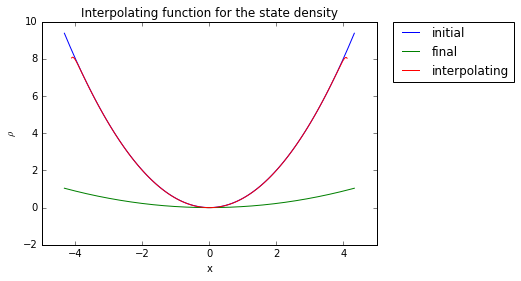

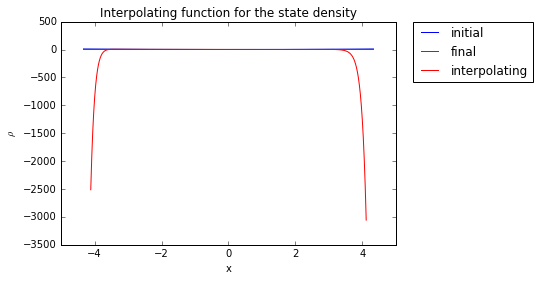

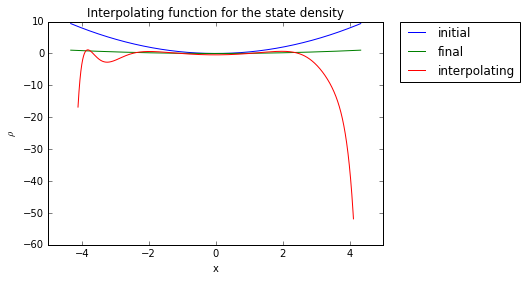

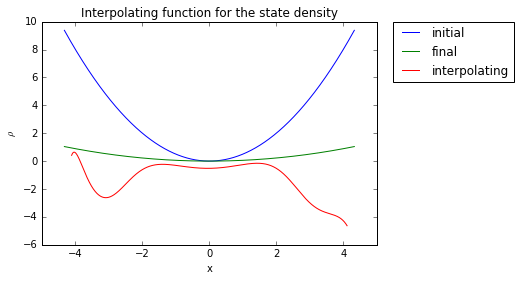

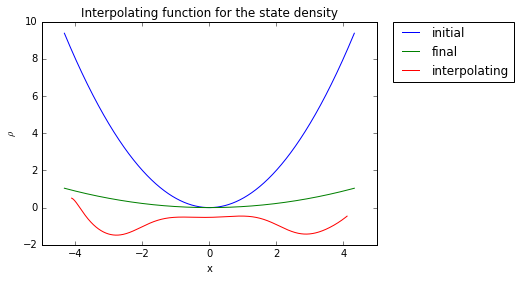

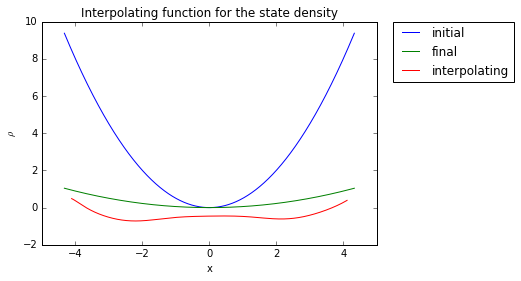

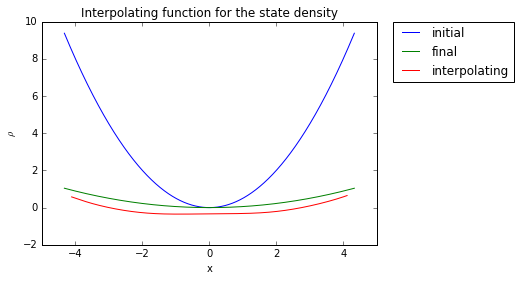

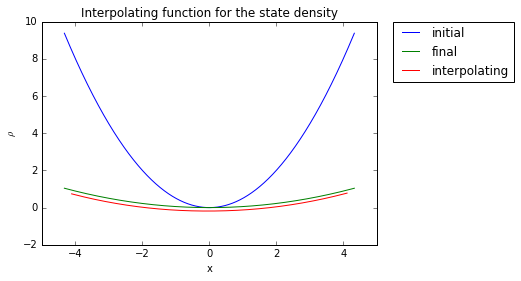

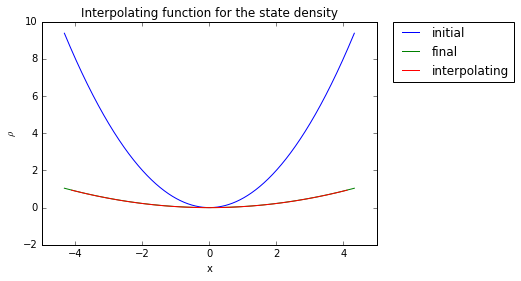

In [16]:
slices=9
for i in range(0,slices):
    title("Interpolating function for the state density")
    ylabel(r"$\rho$")
    xlabel("x")
    plot(x,VI(x),label="initial")
    plot(x,VF(x),label="final")
    plot(x[150:-150],V[floor(i*(size(t)-1)/(slices-1)),150:-150],label="interpolating",c='r')
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    show()



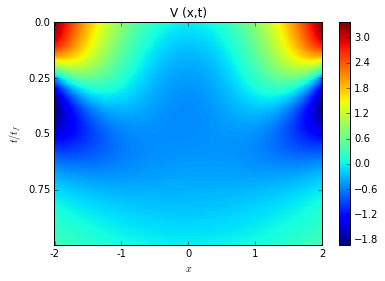

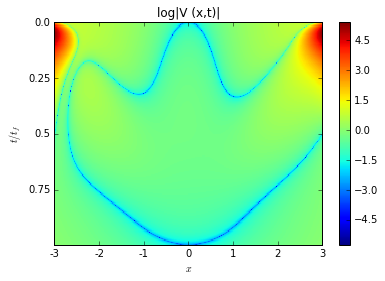

In [17]:
# Two subplots, unpack the axes array immediately
bounds=1200
plt.imshow(V[:,bounds:-bounds], interpolation='nearest', aspect='auto')
plt.title('V (x,t)')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$')
plt.xticks(arange(0,(shape(V)[1]-2*bounds+1),(shape(V)[1]-2*bounds)/4),arange(-2,4))
plt.yticks(arange(0,shape(V)[0],shape(V)[0]/4.0),linspace(0,1,5))
plt.colorbar()

plt.show()

plt.imshow(log10(abs(V)), interpolation='nearest', aspect='auto')
plt.title('log|V (x,t)|')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$')
plt.xticks(arange(0,(shape(V)[1]+1),(shape(V)[1])/6),arange(-3,5))
plt.yticks(arange(0,shape(V)[0],shape(V)[0]/4.0),linspace(0,1,5))
plt.colorbar()

plt.show()



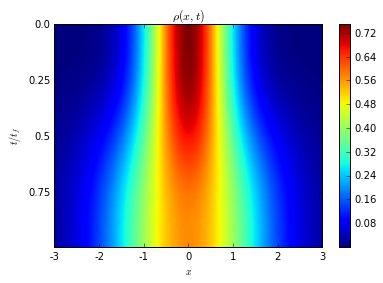

In [18]:
# Two subplots, unpack the axes array immediately
bounds=1
plt.imshow(rhogrid[:,bounds:-bounds], interpolation='nearest', aspect='auto')
plt.title(r'$\rho(x,t)$')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$')
plt.xticks(arange(0,(shape(V)[1]-2*bounds+1),(shape(V)[1]-2*bounds)/6),arange(-3,4))
plt.yticks(arange(0,shape(V)[0],shape(V)[0]/4.0),linspace(0,1,5))
plt.colorbar()

plt.show()




In [19]:
Temp6=[]
for element5 in u:
    Temp6.append(Ninteg(x,element5,0,x,dx))
phase=array(Temp6)

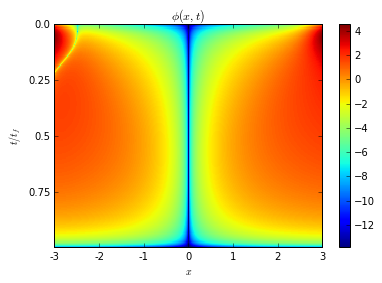

In [20]:
bounds=10
plt.imshow(log(abs(phase[:,bounds:-bounds])+0.000001), interpolation='nearest', aspect='auto')
plt.title(r'$\phi(x,t)$')
plt.ylabel(r'$t/t_{f}$')
plt.xlabel(r'$x$')
plt.xticks(arange(0,(shape(V)[1]-2*bounds+1),(shape(V)[1]-2*bounds)/6),arange(-3,4))
plt.yticks(arange(0,shape(V)[0],shape(V)[0]/4.0),linspace(0,1,5))
plt.colorbar()

plt.show()

In [21]:
exp_energy=zeros(size(t))
for i in range(0,size(t)):
    T_exp=trapz(-rhogrid[i,:]*cos(phase[i,:])*Nderivat2(rhogrid[i,:]*cos(phase[i,:]),dx)-rhogrid[i,:]*sin(phase[i,:])*Nderivat2(rhogrid[i,:]*sin(phase[i,:]),dx))*dx
    V_exp=trapz(rhogrid[i,:]*rhogrid[i,:]*V[i,:])*dx
    exp_energy[i]=T_exp+V_exp
    

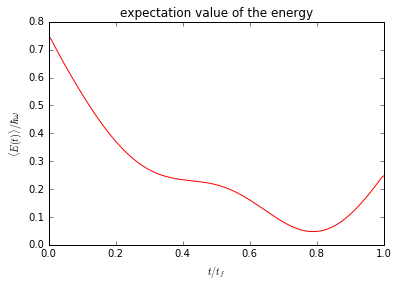

In [22]:

plt.title('expectation value of the energy')
plt.ylabel(r'$\langle E(t) \rangle / \hbar \omega$')
plt.xlabel(r'$t/t_{f}$')
plt.plot(t/tf,exp_energy,c='r')
plt.show()

In [2]:
import numpy as np
from scipy import linalg as la
steps=5000
hbar=1.0
m=2.0
    # get well width and number of wave function desired
W=2.0
# divide by two so a well from -W to W is of input width
W=W/2.0
# create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
# get step size
h=xvec[1]-xvec[0]

Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian +0.5*50000*np.diag(xvec**2)

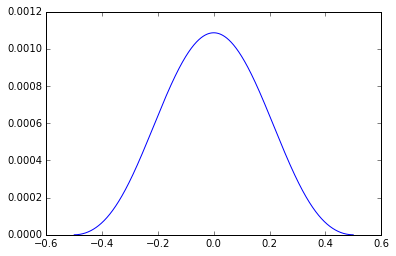

In [7]:
values=la.eigh(Hamiltonian)
plot(xvec,values[1].T[0]*np.conj(values[1].T[0]))

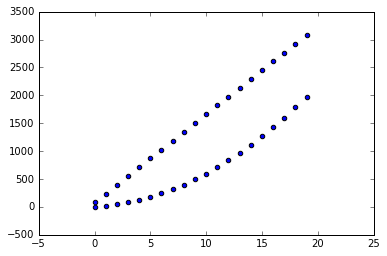

In [4]:
scatter(arange(0,20,1),values[0][0:20])
scatter(arange(0,20,1),(0.5*np.pi**2)*arange(1,21,1)**2)
plt.show()
#plot(arange(0,900,1),100*abs((0.5*np.pi**2)*arange(1,901,1)**2-values[0][0:900])/((0.5*np.pi**2)*arange(1,901,1)**2))
#plt.show()

In [5]:
values[0][1:20]-values[0][0:19]

array([ 158.1128826 ,  158.11188219,  158.11088176,  158.10988133,
        158.10888089,  158.10788044,  158.10687997,  158.1058795 ,
        158.10487902,  158.10387853,  158.10287803,  158.10187752,
        158.100877  ,  158.09987647,  158.09887594,  158.09787539,
        158.09687483,  158.09587427,  158.09487369])

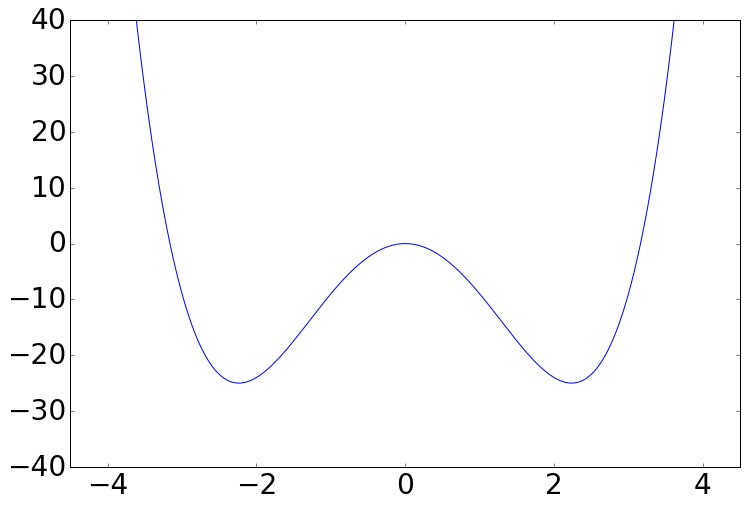

In [275]:
import numpy as np
from scipy import linalg as la
import numpy
numpy.set_printoptions(threshold=numpy.nan)
steps=2000
hbar=1.0
m=1.0
W=10.0
d=0.5
cent=-0.0
# divide by two so a well from -W to W is of input width
W=W/2.0
# create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
# get step size
h=xvec[1]-xvec[0]

V=xvec**4 - 0.5*(10*(xvec)**2*(np.sign( (xvec-cent) )+1)+10*(xvec)**2*(np.sign( -(xvec-cent) )+1))

Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian +np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


plot(xvec,V)
xlim([-4.5,4.5])
ylim([-40,40])
show()


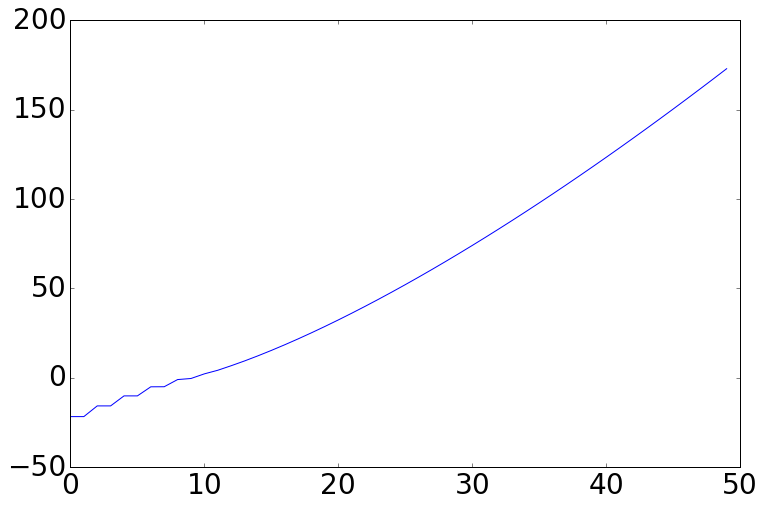

In [276]:
values=la.eigh(Hamiltonian)
plot(values[0][0:50])

-21.889688032
-21.8896879786
-15.8936012598
-15.8935903138
-10.2864381403
-10.2855250512


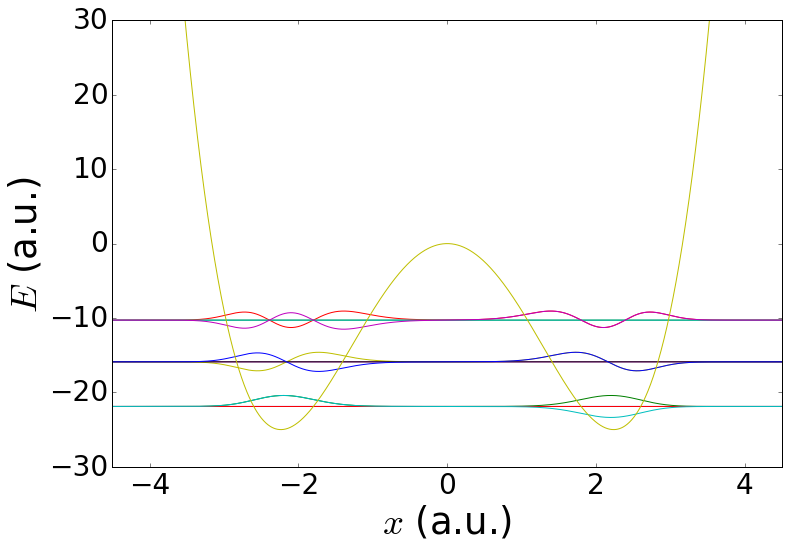

In [277]:

for i in range(0,6):
    
    plot(xvec,values[0][i]*xvec/xvec)
    plot(xvec,(values[1].T)[i]/0.04+values[0][i])
    xlim([-4.5,4.5])
    ylim([-30,30])

    print(values[0][i])
plot(xvec,V)
ylabel("$E$ (a.u.)",size=37)
xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 28})
savefig('degenerateJar.png')

In [33]:
size((values[1].T)[0])

2000

# szilard engine 1

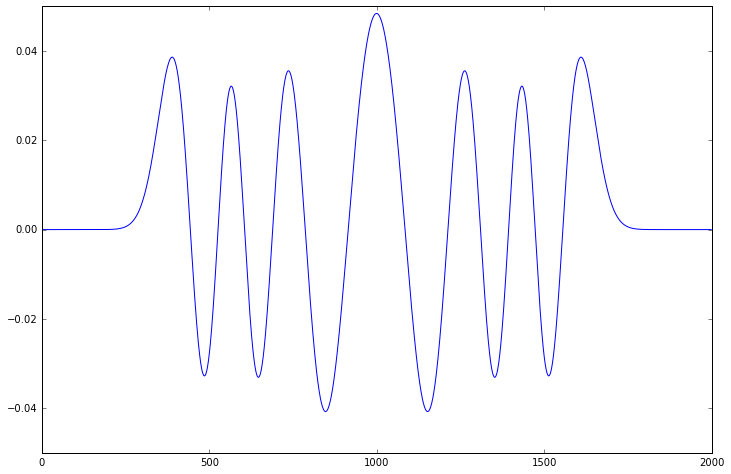

In [247]:
## declaring an array that contains the trayectories of the eigenvalues along each of the trayectories
TrayPsi=zeros([20,2000,400])
Tray=zeros([20,400])
TrayV=zeros([2000,400])
Tray[0:20,200]=values[0][0:20]
TrayPsi[:,:,0]=(values[1].T)[0:20]
size(Tray[0:20,1])
plot(TrayPsi[12,:,0])

In [262]:
##evolution of the energy levels step 1
frames=100
for j in range(frames):
    steps=2000
    hbar=1.0
    m=1.0
    W=10.0
    d=0.5
    cent=-0.0
    # divide by two so a well from -W to W is of input width
    W=W/2.0
    # create x-vector from -W to W
    xvec=np.linspace(-W,W,steps)
    # get step size
    h=xvec[1]-xvec[0]
    #V=2000.0*(j/float(frames-1))*0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))
    V=xvec**4 - 0.5*(10*(j/float(frames-1))*(xvec)**2*(np.sign( (xvec-cent) )+1)+0*(xvec)**2*(np.sign( -(xvec-cent) )+1))
    Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)
    Tray[:,j]=values[0][0:20]
    TrayPsi[:,:,j]=(values[1].T)[0:20]
    TrayV[:,j]=V
    

In [263]:
##evolution of the energy levels step 2
frames=100
for j in range(frames):
    steps=2000
    hbar=1.0
    m=1.0
    W=10.0
    d=0.5
    cent=-0.0
    # divide by two so a well from -W to W is of input width
    W=W/2.0
    # create x-vector from -W to W
    xvec=np.linspace(-W,W,steps)
    # get step size
    h=xvec[1]-xvec[0]
    #V=2000.0*0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))
    V=xvec**4 - 0.5*(10*(xvec)**2*(np.sign( (xvec-cent) )+1)+10*(j/float(frames-1))*(xvec)**2*(np.sign( -(xvec-cent) )+1))


    Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)
    Tray[:,j+100]=values[0][0:20]
    TrayPsi[:,:,j+100]=(values[1].T)[0:20]
    TrayV[:,j+100]=V
    

In [264]:
##evolution of the energy levels step 3
##evolution of the energy levels step 2
frames=100
for j in range(frames):
    steps=2000
    hbar=1.0
    m=1.0
    W=10.0
    d=0.5
    cent=-0.0
    # divide by two so a well from -W to W is of input width
    W=W/2.0
    # create x-vector from -W to W
    xvec=np.linspace(-W,W,steps)
    # get step size
    h=xvec[1]-xvec[0]
    #V=1000.0*0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))
    V=xvec**4 - 0.5*(10*(1-j/float(frames-1))*(xvec)**2*(np.sign( (xvec-cent) )+1)+10*(xvec)**2*(np.sign( -(xvec-cent) )+1))


    Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)
    Tray[:,j+200]=values[0][0:20]
    TrayPsi[:,:,j+200]=(values[1].T)[0:20]
    TrayV[:,j+200]=V
   


In [265]:
frames=100
for j in range(frames):
    steps=2000
    hbar=1.0
    m=1.0
    W=10.0
    d=0.5
    cent=-0.0
    # divide by two so a well from -W to W is of input width
    W=W/2.0
    # create x-vector from -W to W
    xvec=np.linspace(-W,W,steps)
    # get step size
    h=xvec[1]-xvec[0]
    #V=1000.0*0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))
    V=xvec**4 - 0.5*(0*(xvec)**2*(np.sign( (xvec-cent) )+1)+10*(1-j/float(frames-1))*(xvec)**2*(np.sign( -(xvec-cent) )+1))


    Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
    # create Hamiltonian
    Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
#Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)


    values=la.eigh(Hamiltonian)
    Tray[:,j+300]=values[0][0:20]
    TrayPsi[:,:,j+300]=(values[1].T)[0:20]
    TrayV[:,j+300]=V
   


# Szilard engine 2

In [273]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.html.widgets import *
def plotfunc(t):
    for i in Tray[0:7,t]:
        plot(xvec,i*xvec/xvec)
        xlim((-4.5,4.5))
        ylim((-40,40))
        
    plot(xvec,TrayV[:,t])
    show()

interact(plotfunc, t=(0,399,1))

interactive(children=(IntSlider(value=199, description=u't', max=399), Output()), _dom_classes=('widget-interact',))

<function __main__.plotfunc>

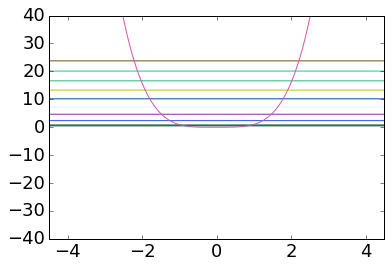

In [282]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-4.5,4.5))
ax.set_ylim((-40,40))
#ax.set_ylabel("$E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})

line, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
line0, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
line1, = ax.plot([], [], lw=1, c=np.random.rand(3,1))
line2, = ax.plot([], [], lw=1, c=np.random.rand(3,1))
line3, = ax.plot([], [], lw=1, c=np.random.rand(3,1))
line4, = ax.plot([], [], lw=1, c=np.random.rand(3,1))
line5, = ax.plot([], [], lw=1, c=np.random.rand(3,1))
line6, = ax.plot([], [], lw=1, c=np.random.rand(3,1))
line7, = ax.plot([], [], lw=1, c=np.random.rand(3,1))
line8, = ax.plot([], [], lw=1, c=np.random.rand(3,1))
line9, = ax.plot([], [], lw=1, c=np.random.rand(3,1))

# initialization function: plot the background of each frame
def init():
    line0.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    line6.set_data([], [])
    line7.set_data([], [])
    line8.set_data([], [])
    line9.set_data([], [])
    
    return (line,)
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
def animate(i):
    
    x0 = xvec
    y0 = Tray[0,i]*xvec/xvec
    line0.set_data(x0, y0)
    
    x1 = xvec
    y1 = Tray[1,i]*xvec/xvec
    line1.set_data(x1, y1)
    
    x2 = xvec
    y2 = Tray[2,i]*xvec/xvec
    line2.set_data(x2, y2)
    
    x3 = xvec
    y3 = Tray[3,i]*xvec/xvec
    line3.set_data(x3, y3)
    
    x4 = xvec
    y4 = Tray[4,i]*xvec/xvec
    line4.set_data(x4, y4)
    
    x5 = xvec
    y5 = Tray[5,i]*xvec/xvec
    line5.set_data(x5, y5)
    
    x6 = xvec
    y6 = Tray[6,i]*xvec/xvec
    line6.set_data(x6, y6)
    
    x7 = xvec
    y7 = Tray[7,i]*xvec/xvec
    line7.set_data(x7, y7)
    
    x8 = xvec
    y8 = Tray[8,i]*xvec/xvec
    line8.set_data(x8, y8)
    
    x9 = xvec
    y9 = TrayV[:,i]
    line9.set_data(x9, y9)
    
    
  
    return(line,)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=399, interval=20, blit=True)
HTML(anim.to_html5_video())


In [283]:

anim.save('animationEneJar.gif', writer='imagemagick', fps=30)

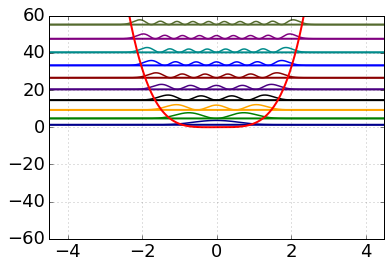

In [301]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-4.5,4.5))
ax.set_ylim((-60,60))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})

ax.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)                                                


line, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
line01, = ax.plot([], [], lw=2, c='darkblue')
line11, = ax.plot([], [], lw=2, c='g')
line21, = ax.plot([], [], lw=2, c='orange')
line31, = ax.plot([], [], lw=2, c='k')
line41, = ax.plot([], [], lw=2, c='indigo')
line51, = ax.plot([], [], lw=2, c='darkred')
line61, = ax.plot([], [], lw=2, c='b')
line71, = ax.plot([], [], lw=2, c='darkcyan')
line81, = ax.plot([], [], lw=2, c='purple')
line91, = ax.plot([], [], lw=2, c='darkolivegreen')


line02, = ax.plot([], [], lw=1.5, c='darkblue')
line12, = ax.plot([], [], lw=1.5, c='g')
line22, = ax.plot([], [], lw=1.5, c='orange')
line32, = ax.plot([], [], lw=1.5, c='k')
line42, = ax.plot([], [], lw=1.5, c='indigo')
line52, = ax.plot([], [], lw=1.5, c='darkred')
line62, = ax.plot([], [], lw=1.5, c='b')
line72, = ax.plot([], [], lw=1.5, c='darkcyan')
line82, = ax.plot([], [], lw=1.5, c='purple')
line92, = ax.plot([], [], lw=1.5, c='darkolivegreen')

line10, = ax.plot([], [], lw=2, c='r')

# initialization function: plot the background of each frame
def init():
    line01.set_data([], [])
    line11.set_data([], [])
    line21.set_data([], [])
    line31.set_data([], [])
    line41.set_data([], [])
    line51.set_data([], [])
    line61.set_data([], [])
    line71.set_data([], [])
    line81.set_data([], [])
    line91.set_data([], [])
    
    line02.set_data([], [])
    line12.set_data([], [])
    line22.set_data([], [])
    line32.set_data([], [])
    line42.set_data([], [])
    line52.set_data([], [])
    line62.set_data([], [])
    line72.set_data([], [])
    line82.set_data([], [])
    line92.set_data([], [])
    
    line10.set_data([], [])
    
    return (line,)
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
def animate(i):
    
    x01 = xvec
    y01 = 2*Tray[0,i]*xvec/xvec
    line01.set_data(x01, y01)
    x02 = xvec
    y02 = TrayPsi[0,:,i]**2/0.0015+2*Tray[0,i]
    line02.set_data(x02, y02)
    
    x11 = xvec
    y11 = 2*Tray[1,i]*xvec/xvec
    line11.set_data(x11, y11)
    x12 = xvec
    y12 = TrayPsi[1,:,i]**2/0.001+2*Tray[1,i]
    line12.set_data(x12, y12)
    
    x21 = xvec
    y21 = 2*Tray[2,i]*xvec/xvec
    line21.set_data(x21, y21)
    x22 = xvec
    y22 = TrayPsi[2,:,i]**2/0.001+2*Tray[2,i]
    line22.set_data(x22, y22)
    
    x31 = xvec
    y31 = 2*Tray[3,i]*xvec/xvec
    line31.set_data(x31, y31)
    x32 = xvec
    y32 = TrayPsi[3,:,i]**2/0.001+2*Tray[3,i]
    line32.set_data(x32, y32)
    
    x41 = xvec
    y41 = 2*Tray[4,i]*xvec/xvec
    line41.set_data(x41, y41)
    x42 = xvec
    y42 = TrayPsi[4,:,i]**2/0.001+2*Tray[4,i]
    line42.set_data(x42, y42)
    
    x51 = xvec
    y51 = 2*Tray[5,i]*xvec/xvec
    line51.set_data(x51, y51)
    x52 = xvec
    y52 = TrayPsi[5,:,i]**2/0.001+2*Tray[5,i]
    line52.set_data(x52, y52)
    
    x61 = xvec
    y61 = 2*Tray[6,i]*xvec/xvec
    line61.set_data(x61, y61)
    x62 = xvec
    y62 = TrayPsi[6,:,i]**2/0.001+2*Tray[6,i]
    line62.set_data(x62, y62)
    
    x71 = xvec
    y71 = 2*Tray[7,i]*xvec/xvec
    line71.set_data(x71, y71)
    x72 = xvec
    y72 = TrayPsi[7,:,i]**2/0.001+2*Tray[7,i]
    line72.set_data(x72, y72)
    
    x81 = xvec
    y81 = 2*Tray[8,i]*xvec/xvec
    line81.set_data(x81, y81)
    x82 = xvec
    y82 = TrayPsi[8,:,i]**2/0.001+2*Tray[8,i]
    line82.set_data(x82, y82)
    
    x91 = xvec
    y91 = 2*Tray[9,i]*xvec/xvec
    line91.set_data(x91, y91)
    x92 = xvec
    y92 = TrayPsi[9,:,i]**2/0.001+2*Tray[9,i]
    line92.set_data(x92, y92)
    
    x10 = xvec
    y10 = 2*TrayV[:,i]
    line10.set_data(x10, y10)
    
  
    return(line,)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=399, interval=40, blit=True)
HTML(anim.to_html5_video())



In [302]:

anim.save('animationJar.gif', writer='imagemagick', fps=15)

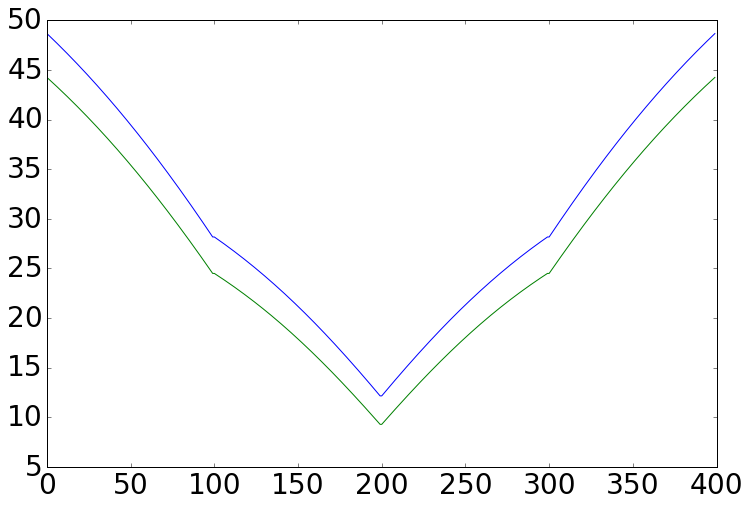

In [326]:
plot(Tray[14,:])
plot(Tray[13,:])

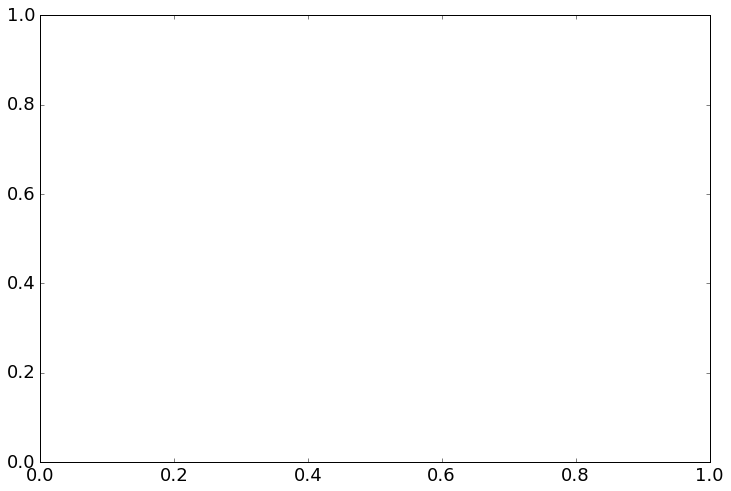

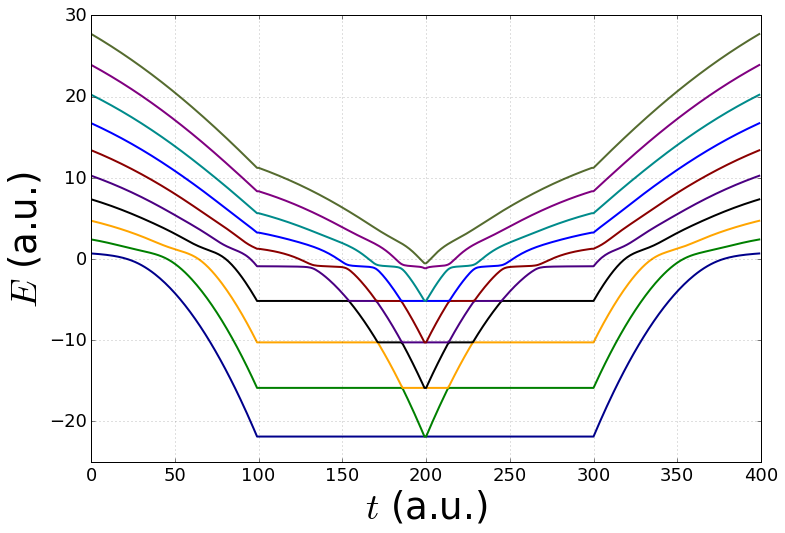

In [333]:
fig, ax = plt.subplots()

rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((0,400))
ax.set_ylim((-25,30))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})

ax.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)  

line, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
line01, = ax.plot([], [], lw=2, c='darkblue')
line11, = ax.plot([], [], lw=2, c='g')
line21, = ax.plot([], [], lw=2, c='orange')
line31, = ax.plot([], [], lw=2, c='k')
line41, = ax.plot([], [], lw=2, c='indigo')
line51, = ax.plot([], [], lw=2, c='darkred')
line61, = ax.plot([], [], lw=2, c='b')
line71, = ax.plot([], [], lw=2, c='darkcyan')
line81, = ax.plot([], [], lw=2, c='purple')
line91, = ax.plot([], [], lw=2, c='darkolivegreen')

tvec=np.arange(size(Tray[i,:]))

def init():
    line01.set_data([], [])
    line11.set_data([], [])
    line21.set_data([], [])
    line31.set_data([], [])
    line41.set_data([], [])
    line51.set_data([], [])
    line61.set_data([], [])
    line71.set_data([], [])
    line81.set_data([], [])
    line91.set_data([], [])
    
    
    return (line,)
# animation function. This
def plottero():
    
    x01 = tvec
    y01 = Tray[0,:]
    line01.set_data(x01, y01)

    
    x11 = tvec
    y11 = Tray[1,:]
    line11.set_data(x11, y11)

    
    x21 = tvec
    y21 = Tray[2,:]
    line21.set_data(x21, y21)
   
    
    x31 = tvec
    y31 = Tray[3,:]
    line31.set_data(x31, y31)

    
    x41 = tvec
    y41 = Tray[4,:]
    line41.set_data(x41, y41)
    
    x51 = tvec
    y51 = Tray[5,:]
    line51.set_data(x51, y51)
  
    
    x61 = tvec
    y61 = Tray[6,:]
    line61.set_data(x61, y61)
    
    x71 = tvec
    y71 = Tray[7,:]
    line71.set_data(x71, y71)
    
    
    x81 = tvec
    y81 = Tray[8,:]
    line81.set_data(x81, y81)
    
    
    x91 = tvec
    y91 = Tray[9,:]
    line91.set_data(x91, y91)
    
    return(line,)
    


plottero()
ylabel("$E$ (a.u.)",size=37)
xlabel("$t$ (a.u.)",size=37)
savefig('EneJ.png')
show()

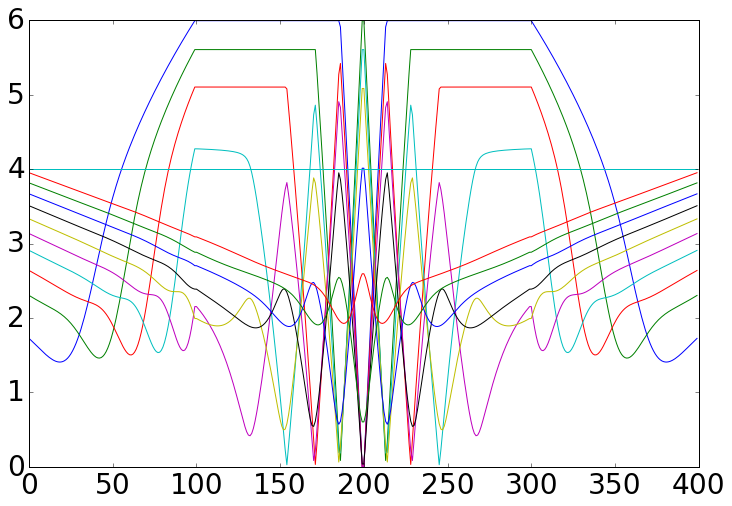

In [321]:
Traydif=[]
for i in range(0,10):
    plot(Tray[i+1,:]-Tray[i,:])
    Traydif.extend(Tray[i+1,:]-Tray[i,:])
plot(ones(400)*4)

18.0 5.33970911931e-08 0.119921896985


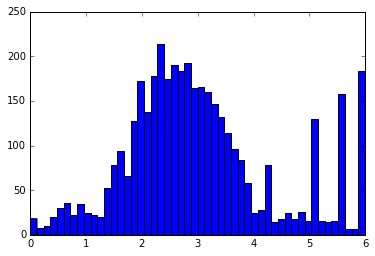

In [130]:
Vals=plt.hist(Traydif, bins=50)
print(Vals[0][0], Vals[1][0], Vals[1][1])


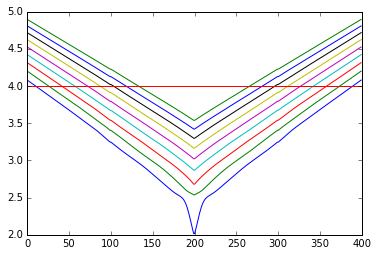

In [139]:
Traydif=[]
for i in range(10,19):
    plot(Tray[i+1,:]-Tray[i,:])
    Traydif.extend(Tray[i+1,:]-Tray[i,:])
plot(ones(400)*4)

4.0 2.01441171177 2.07203222289


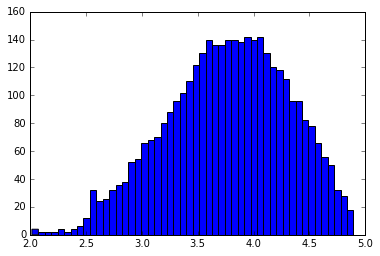

In [132]:
Vals=plt.hist(Traydif, bins=50)
print(Vals[0][0], Vals[1][0], Vals[1][1])



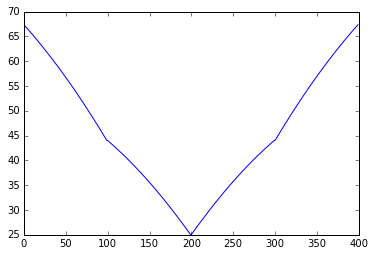

In [133]:
 plot(Tray[i,:])

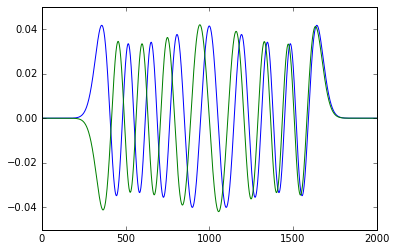

In [134]:
plot(TrayPsi[16,:,200])
plot(TrayPsi[15,:,200])

In [135]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.html.widgets import *
def plotfunc(t):
    plot(TrayPsi[1,:,t])
    show()
def f(x):
    return x
interact(plotfunc, t=(0,399,1))


interactive(children=(IntSlider(value=199, description=u't', max=399), Output()), _dom_classes=('widget-interact',))

<function __main__.plotfunc>

In [138]:
def plotfunc(t):
    plot(TrayPsi[2,:,t])
    show()
def f(x):
    return x
interact(plotfunc, t=(0,399,1))

interactive(children=(IntSlider(value=199, description=u't', max=399), Output()), _dom_classes=('widget-interact',))

<function __main__.plotfunc>

In [137]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.html.widgets import *
def plotfunc(t):
    plot(TrayPsi[16,:,t])
    show()
def f(x):
    return x
interact(plotfunc, t=(0,399,1))



interactive(children=(IntSlider(value=199, description=u't', max=399), Output()), _dom_classes=('widget-interact',))

<function __main__.plotfunc>

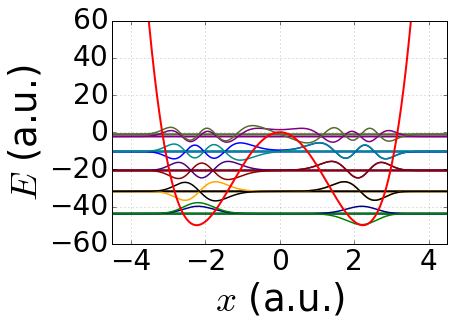

In [310]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-4.5,4.5))
ax.set_ylim((-60,60))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})

ax.grid(which='both')                                                            

# or if you want differnet settings for the grids:                               
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)                                                


line, = ax.plot([], [], lw=2, c=np.random.rand(3,1))
line01, = ax.plot([], [], lw=2, c='darkblue')
line11, = ax.plot([], [], lw=2, c='g')
line21, = ax.plot([], [], lw=2, c='orange')
line31, = ax.plot([], [], lw=2, c='k')
line41, = ax.plot([], [], lw=2, c='indigo')
line51, = ax.plot([], [], lw=2, c='darkred')
line61, = ax.plot([], [], lw=2, c='b')
line71, = ax.plot([], [], lw=2, c='darkcyan')
line81, = ax.plot([], [], lw=2, c='purple')
line91, = ax.plot([], [], lw=2, c='darkolivegreen')


line02, = ax.plot([], [], lw=1.5, c='darkblue')
line12, = ax.plot([], [], lw=1.5, c='g')
line22, = ax.plot([], [], lw=1.5, c='orange')
line32, = ax.plot([], [], lw=1.5, c='k')
line42, = ax.plot([], [], lw=1.5, c='indigo')
line52, = ax.plot([], [], lw=1.5, c='darkred')
line62, = ax.plot([], [], lw=1.5, c='b')
line72, = ax.plot([], [], lw=1.5, c='darkcyan')
line82, = ax.plot([], [], lw=1.5, c='purple')
line92, = ax.plot([], [], lw=1.5, c='darkolivegreen')

line10, = ax.plot([], [], lw=2, c='r')

# initialization function: plot the background of each frame
def init():
    line01.set_data([], [])
    line11.set_data([], [])
    line21.set_data([], [])
    line31.set_data([], [])
    line41.set_data([], [])
    line51.set_data([], [])
    line61.set_data([], [])
    line71.set_data([], [])
    line81.set_data([], [])
    line91.set_data([], [])
    
    line02.set_data([], [])
    line12.set_data([], [])
    line22.set_data([], [])
    line32.set_data([], [])
    line42.set_data([], [])
    line52.set_data([], [])
    line62.set_data([], [])
    line72.set_data([], [])
    line82.set_data([], [])
    line92.set_data([], [])
    
    line10.set_data([], [])
    
    return (line,)
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
def animate3(i):
    
    x01 = xvec
    y01 = 2*Tray[0,i]*xvec/xvec
    line01.set_data(x01, y01)
    x02 = xvec
    y02 = TrayPsi[0,:,i]/0.015+2*Tray[0,i]
    line02.set_data(x02, y02)
    
    x11 = xvec
    y11 = 2*Tray[1,i]*xvec/xvec
    line11.set_data(x11, y11)
    x12 = xvec
    y12 = TrayPsi[1,:,i]/0.01+2*Tray[1,i]
    line12.set_data(x12, y12)
    
    x21 = xvec
    y21 = 2*Tray[2,i]*xvec/xvec
    line21.set_data(x21, y21)
    x22 = xvec
    y22 = TrayPsi[2,:,i]/0.01+2*Tray[2,i]
    line22.set_data(x22, y22)
    
    x31 = xvec
    y31 = 2*Tray[3,i]*xvec/xvec
    line31.set_data(x31, y31)
    x32 = xvec
    y32 = TrayPsi[3,:,i]/0.01+2*Tray[3,i]
    line32.set_data(x32, y32)
    
    x41 = xvec
    y41 = 2*Tray[4,i]*xvec/xvec
    line41.set_data(x41, y41)
    x42 = xvec
    y42 = TrayPsi[4,:,i]/0.01+2*Tray[4,i]
    line42.set_data(x42, y42)
    
    x51 = xvec
    y51 = 2*Tray[5,i]*xvec/xvec
    line51.set_data(x51, y51)
    x52 = xvec
    y52 = TrayPsi[5,:,i]/0.01+2*Tray[5,i]
    line52.set_data(x52, y52)
    
    x61 = xvec
    y61 = 2*Tray[6,i]*xvec/xvec
    line61.set_data(x61, y61)
    x62 = xvec
    y62 = TrayPsi[6,:,i]/0.01+2*Tray[6,i]
    line62.set_data(x62, y62)
    
    x71 = xvec
    y71 = 2*Tray[7,i]*xvec/xvec
    line71.set_data(x71, y71)
    x72 = xvec
    y72 = TrayPsi[7,:,i]/0.01+2*Tray[7,i]
    line72.set_data(x72, y72)
    
    x81 = xvec
    y81 = 2*Tray[8,i]*xvec/xvec
    line81.set_data(x81, y81)
    x82 = xvec
    y82 = TrayPsi[8,:,i]/0.01+2*Tray[8,i]
    line82.set_data(x82, y82)
    
    x91 = xvec
    y91 = 2*Tray[9,i]*xvec/xvec
    line91.set_data(x91, y91)
    x92 = xvec
    y92 = TrayPsi[9,:,i]/0.01+2*Tray[9,i]
    line92.set_data(x92, y92)
    
    x10 = xvec
    y10 = 2*TrayV[:,i]
    line10.set_data(x10, y10)
    
  
    return(line,)
animate3(199)
ax.set_ylabel("$E$ (a.u.)",size=37)
ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 28})
savefig('degenerateJar.png')
